# 1 Introduction

Welcome to the ninth practical session of CS233 - Introduction to Machine Learning.  
In this exercise class we will start using Machine Learning methods to solve regression problems.

In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 2 Regression Problem

Let $f$ be a function $f: \mathbb{R}^d \rightarrow \mathbb{R}^v$ with a data set $\left(X \subseteq \mathbb{R}^d, y
\subseteq\mathbb{R}^v \right )$. The regression problem is the task of estimating an approximation $\hat{f}$ of $f$.
Within this exercise we consider the special case of $v=1$, i.e. the problem is univariate as opposed to multivariate.
Specifically, we will analyze the Boston house prices data set and predict costs based on properties such as per capita crime rate by town, pupil-teacher ratio by town etc.

We will model the given data by means of a linear regression model, i.e. a model that explains a dependent variable in terms of a linear combination of independent variables.

- How does a regression problem differ from a classification problem?
- Why is the linear regression model a linear model? Is it linear in the dependent variables? Is it linear in the parameters?

# 2.1 Load and inspect data

We load the data and split it such that 80% and 20% are train and test data, respectively. 
After, we normalize the data such that each feature has zero mean and unit standard deviation. Please fill in the required code and complete the function `normalize`.

- Explore the relation between different features and the house prices. Describe what you see. Can you identify any trends?

In [3]:
# get the data set and print a description
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.DESCR)

X = boston_dataset["data"]
y = boston_dataset["target"]

# remove categorical feature
X = np.delete(X, 3, axis=1)
# removing second mode
ind = y<40
X = X[ind,:]
y = y[ind]

# split the data into 80% training and 20% test data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

splitRatio = 0.8
n          = X.shape[0]
X_train    = X[indices[0:int(n*splitRatio)],:] 
y_train    = y[indices[0:int(n*splitRatio)]] 
X_test     = X[indices[int(n*(splitRatio)):],:] 
y_test     = y[indices[int(n*(splitRatio)):]] 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
'''
Make mean 1 and std dev 0 of the data.
'''
def normalize(X):
    """
    Please fill in the required code here
    """
    
    mu    = np.mean(X)
    std   = np.std(X)
    X     = (X - mu) / std  # normalize
    return X, mu, std

#Use train stats for normalizing test set
X_train,mu_train,std_train = normalize(X_train)
X_test = (X_test-mu_train)/std_train

Text(0.5, 1.0, 'Attribute $X_0$ vs Price $y$')

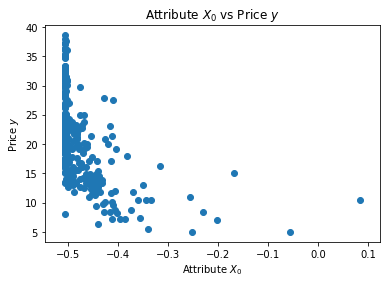

In [5]:
# exploratory analysis of the data

feature = 0
plt.scatter(X_train[:,feature], y_train)
plt.xlabel(f"Attribute $X_{feature}$")
plt.ylabel("Price $y$")
plt.title(f"Attribute $X_{feature}$ vs Price $y$")

# 2.2 Closed-form solution for linear regression

The linear regression model has an [analytical solution](https://en.wikipedia.org/wiki/Linear_least_squares). 
Please use this solution to complete the function `get_w_analytical` and to obtain the weight parameters $w$. Tip: You may want to use the function np.linalg.solve. 

- What is the time complexity of this approach?

In [6]:
def get_w_analytical(X_train,y_train):
    """compute the weight parameters w"""
        
    # compute w via the normal equation
    # X @ w = y
    w = np.linalg.solve(X, y)
    return w

def get_loss(w, X_train, y_train,X_test,y_test,val=False):
    # predict dependent variables and MSE loss for seen training data
    """
    Please fill in the required code here
    """
    loss_train = 
    loss_train_std = 
        
    # predict dependent variables and MSE loss for unseen test data
    """
    Please fill in the required code here
    """
    loss_test = 
    loss_test_std = 
    
    if not val:
        print("The training loss is {} with std:{}. The test loss is {} with std:{}.".format(loss_train, loss_train_std, loss_test,loss_test_std))
    else:
        print("The training loss is {} with std:{}. The val loss is {} with std:{}.".format(loss_train, loss_train_std, loss_test,loss_test_std))

    return loss_test

SyntaxError: invalid syntax (<ipython-input-6-b726bfaf0aac>, line 18)

In [ ]:
# compute w and calculate its goodness
w_ana = get_w_analytical(X_train,y_train)
get_loss(w_ana, X_train,y_train, X_test,y_test)

###### 2.3 Feature expansion

Similar to feature expansion for classification problems, we can also perform feature expansion here. Please complete the function `expand_X` and perform a degree-2 polynomial feature expansion of X, including a bias term but omitting interaction terms.

- Is our model still a linear regression model? Why (not)?
- How does linear regression on degree-2 polynomially expanded data compare against our previous model? Explain!
- Try polynomial feature expansion for different parameters values of $d$. What do you observe? Explain!
- Look up the concept of the condition number of a matrix. What does this tell us about the feature-expanded data?

In [ ]:
def expand_X(X,y,d):
    """perform degree-d polynomial feature expansion of X, with bias but omitting interaction terms"""
    
    """
    Please fill in the required code here
    """

    return expand

In [ ]:
def expand_and_normalize_X(X,d):
    """
    perform degree-d polynomial feature expansion of X, with bias but omitting interaction terms
    and normalize them and return mean and std
    """
    
    """
    Please fill in the required code here
    """

    return expand, mu, std

In [ ]:
# perform polynomial feature expansion
d  = 2

#normalize the data after expansion
X_train_poly,mu_train_poly,std_train_poly = expand_and_normalize_X(X_train,d)
X_test_poly  = expand_X(X_test,d)
X_test_poly[:,1:]  = (X_test_poly[:,1:]-mu_train_poly)/std_train_poly


print("The original data has {} features.".format(X_train.shape[1]))
print("After degree-{} polynomial feature expansion (with bias, without interaction terms) the data has {} features.".format(d,X_train_poly.shape[1]))

cond_num_before = np.linalg.cond(X_train.T@X_train)
cond_num_after = np.linalg.cond(X_train_poly.T@X_train_poly)
print("The original data X^TX has condition number {}. \nThe expanded data X^TX has condition number {}.".format(cond_num_before,cond_num_after))

# re-compute w and calculate its goodness
w_augm = get_w_analytical(X_train_poly,y_train)
get_loss(w_augm, X_train_poly,y_train, X_test_poly,y_test)

In above exercise, we directly evaluate model on test loss and choose the best degree of polynomial. But test should not be touched until your final model. So to choose best degree we'll use Cross Validation. We're going to K-Fold CV for that. We will use our training set and create K splits of it to choose best degree and finally evaluate on our test set.


In [ ]:
# Function for using kth split as validation set to get loss
# and k-1 splits to train our model
# k = kth fold
# k_fold_ind = all the fold indices
# X,Y= train data and labels
# degree = degree of polynomial expansion

def do_cross_validation(k,k_fold_ind,X,Y,degree=1):
    
    # use one split as val
    val_ind = k_fold_ind[k]
    # use k-1 split to train
    train_splits = [i for i in range(k_fold_ind.shape[0]) if i is not k]
    train_ind = k_fold_ind[train_splits,:].reshape(-1)
    
    #Get train and val 
    cv_X_train = X[train_ind,:]
    cv_Y_train = Y[train_ind]
    cv_X_val = X[val_ind,:]
    cv_Y_val = Y[val_ind]

    #expand and normalize for degree d
    cv_X_train_poly,mu,std = 
    #apply the normalization using statistics (mean, std) computed on train data
    cv_X_val_poly = 

    
    #fit on train set
    w = 
    
    #get loss for val
    loss_test = get_loss(w,cv_X_train_poly,cv_Y_train,cv_X_val_poly,cv_Y_val,val=True)
    return loss_test


Let's do 3-fold CV

In [ ]:
from helper import fold_indices
k_fold=3

# We create the k_fold splits of the train data and fix this
num_train_examples = X_train.shape[0]
fold_ind = fold_indices(num_train_examples,k_fold)

In [ ]:
from helper import grid_search_cv

# put the list of degree values to be evaluated
search_degree =
params={'degree':search_degree}

#call to the grid search function
grid_val,grid_val_std = grid_search_cv(params,k_fold,fold_ind,do_cross_validation,X_train,y_train)

Observe how the validation score decreases and then increases with degree

In [ ]:
#get the best validation score
best_score = 
print('Best val score {}'.format(best_score))

#get degree which gives best score
best_degree = 
print('Best val score for degree {}'.format(best_degree))


X_train_poly,mu,std = expand_and_normalize_X(X_train,best_degree)
w = get_w_analytical(X_train_poly,y_train)
X_test_poly = expand_X(X_test,best_degree)
X_test_poly[:,1:] =  (X_test_poly[:,1:]-mu)/std

get_loss(w,X_train_poly,y_train,X_test_poly,y_test)

# 2.3 Numerical solution for linear regression


The linear regression model has an analytical solution, but we can also get the weight parameters $w$ numerically, e.g. via stochastic gradient descent. Please use this approach to complete the function `get_w_numerical` below.

- How do these results compare against those of the analytical solution? Explain the differences or similarities!
- In which cases may it (not) be preferable to use the numerical approach over the analytical solution?

In [ ]:
def get_w_numerical(X_train,y_train,X_test_poly,y_test,epochs,lr):
    """compute the weight parameters w"""
    
    """
    Please fill in the required code here
    """
    
    # initialize the weights
    w    = np.random.normal(0, 1e-1, X_train.shape[1])
    
    # iterate a given number of epochs over the training data
    for epoch in range(epochs):
        
        # iterate over each data point
        for idx,x_train in enumerate(X_train):
            # update the weights
            w += 
            
        if epoch % 1000 == 0:
            print(f"Epoch {1000+epoch}/{epochs}")
            get_loss(w, X_train_poly,y_train, X_test_poly,y_test)
            
    return w

In [ ]:
# compute w and calculate its goodness
X_train_poly,mu,std = expand_and_normalize_X(X_train,best_degree)
X_test_poly = expand_X(X_test,best_degree)
X_test_poly[:,1:] =  (X_test_poly[:,1:]-mu)/std
w_num = get_w_numerical(X_train_poly,y_train,X_test_poly,y_test,15000,8*1e-5)

We can also use the sklearn implementation of the linear regression model. Please look up the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to 

1. instantiate the LinearRegression model
2. fit the model to our training data
3. evaluate the model on the test data
4. and compare the results with our previous outcomes

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

"""
Please fill in the required code here
"""
    
model = 

y_hat = 

print('MSE of sklearn linear regression model on test data: ' , metrics.mean_squared_error(y_test,y_hat))

# 2.4 Ridge Regression

As seen in previous section, we would like to do feature expansion to fit the non-linearity of the data, but it soon leads to overfitting. There are different ways to tackle this problem, like getting more data, changing the prediction method, regularization, etc. For the task of regression, we'll add a regularization to our training objective to mitigate this problem. Intutively, regularization restricts the domain from which the values of model parameters are taken, which means that we are biasing our model.  

In Ridge Regression, we restrict the $l_2$ norm of the coefficients $\mathbf{w}$. Our loss function looks as following,
\begin{align}
L(\mathbf{w}) &=\frac{1}{N}(\mathbf{y} - \mathbf{X}\mathbf{w})^2 + \frac{\lambda}{N}\|\mathbf{w}\|^2 \\
\nabla L(\mathbf{w}) &= -\frac{2}{N}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\mathbf{w}) + 2\frac{\lambda}{N}\mathbf{w}
\end{align}

$\nabla L(\mathbf{w}) = 0$ for minimum condition, we get

\begin{align}
\mathbf{w} &= (\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}
\end{align}

dimensions are following: $\mathbf{w}$ is $D\times1$; $\mathbf{y}$ is $N\times1$; $\mathbf{X}$ is $N\times D$; $\mathbf{I}$ is identity matrix of dimension $D \times D$ .

$\lambda$ is our penality term, also know as weight decay. By varying its value, we can allow biasing in our model.

**Question**:
When $\lambda$ is high, our model is more complex or less?


**Question**:
How will $\lambda$ affect inverse condition number of $\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I}$ ?



In [ ]:
def get_w_analytical_with_regularization(X_train,y_train,lmda):
    """compute the weight parameters w with ridge regression"""
    
    """
    Please fill in the required code here
    """
    #create lambda matrix 
    lmda_mat = 
    # compute w via the normal equation
    # np.linalg.solve is more stable than np.linalg.inv
    w = 
    return w

In [ ]:
# perform polynomial feature expansion
d  = 

#normalize the data after expansion
X_train_poly,mu_train_poly,std_train_poly = expand_and_normalize_X(X_train,d)
X_test_poly  = expand_X(X_test,d)
X_test_poly[:,1:]  = (X_test_poly[:,1:]-mu_train_poly)/std_train_poly


print("The original data has {} features.".format(X_train.shape[1]))
print("After degree-{} polynomial feature expansion (with bias, without interaction terms) the data has {} features.".format(d,X_train_poly.shape[1]))

cond_num_before = np.linalg.cond(X_train.T@X_train)
cond_num_after = np.linalg.cond(X_train_poly.T@X_train_poly)
print("The original data X^TX has condition number {}. \nThe expanded data X^TX has condition number {}.".format(cond_num_before,cond_num_after))

#choose lambda value
lmda = 

#write the X^TX+\lambda*I matrix
A = 
cond_num_ridge = np.linalg.cond(A)
print("The X^TX+lambda*I with lambda:{} has condition number {}".format(lmda,cond_num_ridge))


See how the condition number has changed with regularization.

Cross Validation(CV) is used to choose value of $\lambda$. As seen in previous exercise, we will use K-fold CV.
We will use our training set and create K splits of it to choose best degree and corresponding $\lambda$ and finally evaluate on our test set.

In [ ]:
# Function for using kth split as validation set to get accuracy
# and k-1 splits to train our model
# k = kth fold
# k_fold_ind = all the fold indices
# X,Y= train data and labels
# lmbda= penalty term
# degree = degree of polynomial expansion
def do_cross_validation_reg(k,k_fold_ind,X,Y,lmda=0,degree=1):
    
    # use one split as val
    val_ind = k_fold_ind[k]
    # use k-1 split to train
    train_splits = [i for i in range(k_fold_ind.shape[0]) if i is not k]
    train_ind = k_fold_ind[train_splits,:].reshape(-1)
   
    #Get train and val 
    cv_X_train = X[train_ind,:]
    cv_Y_train = Y[train_ind]
    cv_X_val = X[val_ind,:]
    cv_Y_val = Y[val_ind]
    
   
    #expand and normalize for degree d
    cv_X_train_poly,mu,std = 

    #apply the normalization using statistics (mean, std) computed on train data
    cv_X_val_poly = 
    
    #fit on train set using regularised version
    w = 
    
    #get loss for val
    loss_test = get_loss(w,cv_X_train_poly,cv_Y_train,cv_X_val_poly,cv_Y_val,val=True)
    print(loss_test,lmda,degree)
    return loss_test

Let's do 3-fold CV. We will use same the training data splits as in non regularised case for fairer comparison.

In [ ]:
#list of lambda values to try.. use np.logspace
search_lambda = 
#list of degrees
search_degree = 

params = {'degree':search_degree,'lmda':search_lambda,}
k_fold =3
#call to the grid search function
grid_val,grid_val_std = grid_search_cv(params,k_fold,fold_ind,do_cross_validation_reg,X_train,y_train)

In [ ]:
from helper import plot_cv_result
plot_cv_result(np.log((grid_val.T)),search_lambda,search_degree)

In [ ]:
from helper import plot_cv_result
plot_cv_result(np.log((grid_val_std.T)),search_lambda,search_degree)

In [ ]:
# best val score
best_score = 
print(best_score)

# params which give best val score

best_degree = 
best_lambda = 
print('Best score achieved using degree:{} and lambda:{}'.format(best_degree,best_lambda))


In [ ]:
#Evaluate on the test set
X_train_poly,mu,std = expand_and_normalize_X(X_train,best_degree)
w = get_w_analytical_with_regularization(X_train_poly,y_train,best_lambda)
X_test_poly = expand_X(X_test,best_degree)
X_test_poly[:,1:] =  (X_test_poly[:,1:]-mu)/std

get_loss(w,X_train_poly,y_train,X_test_poly,y_test)

**Question**: How can you interpret the linear regression coefficients?

**Question**: Is it good to have coefficients' values close to zero? 

**Question**: How would you proceed to improve the prediction?
